In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [3]:
target_latency = 150

In [5]:
# local_df = pd.read_csv("../measurements/local_long/map.csv")
# root_folder = "../measurements/direct_split_quantize/"
# mag_folder = "../measurements_vidvrd/test_ltl_15/"

local_df = pd.read_csv("../measurements_vidvrd/local_test/map.csv")
root_folder = "../measurements_vidvrd/test_ltl_15_1/"

# local_df = pd.read_csv("../measurements_bev/local_test/map.csv")
# root_folder = "../measurements_bev/direct_split/"
# mag_folder = "../measurements_bev/test_ltl_15_2/"


map_df = pd.read_csv(root_folder+"map.csv")
cha_df = pd.read_csv(root_folder+"characteristic.csv")
mag_df = pd.read_csv(root_folder+"manager.csv")
tim_df = pd.read_csv(root_folder+"time.csv")

tim_df["transmission_time"] = cha_df["datasize_est"]*8/cha_df["bandwidth"]*1000
tim_df["overall_est"] = tim_df["model_head_time"]*10+tim_df["model_tail_time"]+tim_df["framework_head_time"]+tim_df["framework_tail_time"] + tim_df["compression_time"]+tim_df["decompression_time"]+ tim_df["transmission_time"]

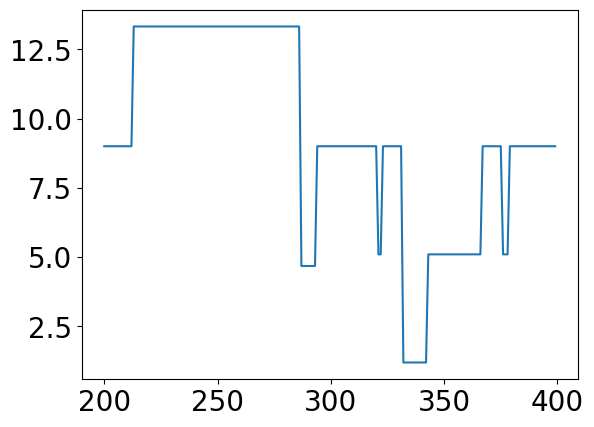

In [6]:
plt.plot(cha_df["bandwidth"][200:]/1e6)

In [330]:
map_df

,pruning_thresh,quality,technique,frame_id,datasize,sensitivity,map
0,0,0,0,1,86968,1.0,1.000000
1,0,0,0,2,86968,1.0,1.000000
2,0,0,0,3,86968,1.0,1.000000
3,0,0,0,4,86968,1.0,1.000000
4,0,0,0,5,86968,1.0,0.942857
...,...,...,...,...,...,...,...
395,0,0,0,396,86968,0.5,0.500000
396,0,0,0,397,86968,0.5,0.500000
397,0,0,0,398,86968,0.5,0.500000
398,0,0,0,399,86968,0.5,0.500000


In [7]:
drops = []

for i in range(400):
    try:
        d = mag_df[mag_df["frame_id"]==i+1]["drop"].tolist()[0]
        if d >0.4:
            d=0.4
        drops.append(d)
    except:
        drops.append(drops[-1])


df = pd.DataFrame()
df["traget_drops"] = drops

In [8]:
df["map_drop"] = local_df["map"] - map_df["map"]
df["sen_drop"] = local_df["sensitivity"] - map_df["sensitivity"]

In [9]:
cha_df.head()

,pruning_thresh,quality,technique,bandwidth,drop,frame_id,sparsity,decomposability,regularity,pictoriality,compression_ratio,datasize_est,datasize_real,reconstruct_snr,target_cmp,target_snr,consumed_bw
0,0.10,3,3,9000000.0,0.3,1,0.884419,-1,-1,-1,17.303870,20002,167420,7.563793,-1.0,-1.0,-1.0
1,0.20,70,1,9000000.0,0.3,2,0.946780,-1,-1,-1,52.946612,6537,7281,8.067359,-1.0,-1.0,-1.0
2,0.00,70,1,9000000.0,0.3,3,0.001052,-1,-1,-1,26.121660,13250,13994,11.000898,-1.0,-1.0,-1.0
3,0.00,80,1,9000000.0,0.3,4,0.000335,-1,-1,-1,26.404638,13108,13852,11.822256,-1.0,-1.0,-1.0
4,0.15,3,2,9000000.0,0.3,5,0.911705,-1,-1,-1,4.333333,79872,180219,11.163898,-1.0,-1.0,-1.0


In [10]:
df["overall_time"] =tim_df["overall_est"] 

In [12]:
df = df[200:]
df

,traget_drops,map_drop,sen_drop,overall_time
200,0.4,0.133333,0.00,123.112381
201,0.4,0.066667,0.00,125.788285
202,0.4,0.000000,0.00,125.431026
203,0.4,0.000000,0.00,119.469496
204,0.4,-0.125000,-0.25,116.685710
...,...,...,...,...
395,0.4,0.500000,0.50,125.654463
396,0.4,0.000000,0.00,118.870950
397,0.4,0.000000,0.00,127.448989
398,0.4,0.000000,0.00,118.933186


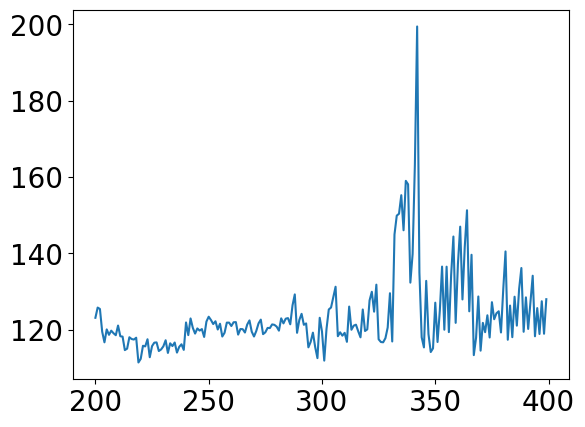

In [13]:
plt.plot(df["overall_time"])

In [17]:
df.std()

traget_drops     0.095633
map_drop         0.140923
sen_drop         0.147205
overall_time    10.541154
dtype: float64

In [15]:
good_df = df[df["map_drop"]<df["traget_drops"]]
good_df= good_df[good_df["sen_drop"]<good_df["traget_drops"]]
# good_df= good_df[good_df["bw_com"]<good_df["bandwidth"]]
good_df= good_df[good_df["overall_time"]<target_latency]

In [16]:
len(good_df)/200

0.915